In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1. DL 구조와 레이어

## 1-1. Input 객체
- 딥러닝 모델의 입력을 정의
- 데이터의 모양(shape), 예상 데이터 유형(dtype)등을 포함

In [2]:
keras.Input(shape=(8,), dtype=tf.int32)

<KerasTensor: shape=(None, 8) dtype=int32 (created by layer 'input_1')>

In [3]:
keras.Input(shape=(28, 28), dtype=tf.float32)

<KerasTensor: shape=(None, 28, 28) dtype=float32 (created by layer 'input_2')>

## batch size & name

In [4]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16)

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input_3')>

In [5]:
keras.Input(shape=(28, 28), dtype=tf.float32, batch_size=16, name='input')

<KerasTensor: shape=(16, 28, 28) dtype=float32 (created by layer 'input')>

## 1-2. Dense layer
- Fully connected layer

In [6]:
layers.Dense(10) # 노드 10개

In [7]:
layers.Dense(10, name='layer1') # 이름 layer1로 지정

In [8]:
layers.Dense(10, activation='relu') # 활성화 함수 지정

In [9]:
layers.Dense(10, activation='relu', name='Dense Layer') # 레이어 이름 + 활성화 함수 지정 동시에

In [10]:
inputs = tf.random.uniform(shape=(5, 2))
print(inputs)
layer = layers.Dense(10, activation='relu')
outputs = layer(inputs)
print(layer.weights)
print(layer.bias)
print(outputs)

tf.Tensor(
[[0.2322421  0.8703104 ]
 [0.06712735 0.44629335]
 [0.7794777  0.9451283 ]
 [0.27866876 0.28511405]
 [0.5383427  0.11335158]], shape=(5, 2), dtype=float32)
[<tf.Variable 'dense_2/kernel:0' shape=(2, 10) dtype=float32, numpy=
array([[ 0.55993587,  0.6616449 , -0.1460166 , -0.5195309 , -0.12538904,
         0.36892515, -0.28991485,  0.34262937,  0.23657125,  0.5260624 ],
       [ 0.10286021,  0.197707  ,  0.26913226,  0.0940569 ,  0.6783306 ,
         0.6158518 , -0.466237  ,  0.6374863 , -0.2539796 , -0.06556332]],
      dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]
<tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>
tf.Tensor(
[[0.21956101 0.32572827 0.20031741 0.         0.5612376  0.6216622
  0.         0.6343839  0.         0.0651134 ]
 [0.08349284 0.13264978 0.11031023 0.00710224 0.2943174  0.2996155

# 2. DL 모델

In [11]:
from tensorflow.keras import models, utils

## 2-1. Sequential API
- equential API 이용 방법은 모델이 순차적인 구조로 진행할 때 사용하는 간단한 방법
- 이 방법은 다중 입력 및 출력이 존재하는 등의 복잡한 모델을 구성할 수 없습니다.

### 2-1-1. Sequential 인자에 사용할 레이어들을 순차적으로 추가

In [12]:
model = models.Sequential() # Sequential
model.add(layers.Input(shape=(28, 28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 28, 300)           8700      
                                                                 
 dense_4 (Dense)             (None, 28, 100)           30100     
                                                                 
 dense_5 (Dense)             (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


### 2-1-2. Sequential 인자에 한번에 추가

In [13]:
model = models.Sequential([layers.Input(shape=(28, 28), name='Input'),
                           layers.Dense(300, activation='relu', name='Dense1'),
                           layers.Dense(100, activation='relu', name='Dense2'),
                           layers.Dense(10, activation='softmax', name='Output')])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 100)           30100     
                                                                 
 Output (Dense)              (None, 28, 10)            1010      
                                                                 
Total params: 39,810
Trainable params: 39,810
Non-trainable params: 0
_________________________________________________________________


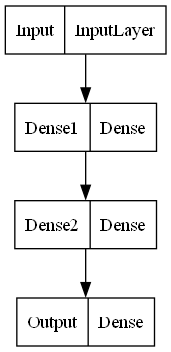

In [14]:
utils.plot_model(model)

In [15]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## 2-2. Functional API
- 권장
- Functional API는 딥러닝 모델을 복잡하고, 유연하게 구성하는 것이 가능하며, 다중 입출력을 다룰 수 있습니다.

In [16]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


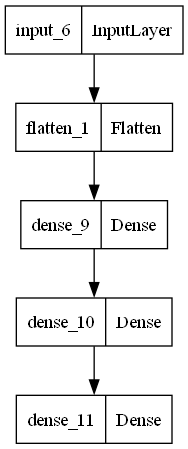

In [17]:
utils.plot_model(model)

### 2-2-1. 인풋을 여러 레이어에서 사용 가능

In [18]:
inputs = keras.Input(shape=(28, 28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation='relu')(hidden1)

# 결합
concat = layers.Concatenate()([inputs, hidden2])
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 28, 100)      2900        ['input_7[0][0]']                
                                                                                                  
 dense_13 (Dense)               (None, 28, 30)       3030        ['dense_12[0][0]']               
                                                                                                  
 concatenate (Concatenate)      (None, 28, 58)       0           ['input_7[0][0]',                
                                                                  'dense_13[0][0]']         

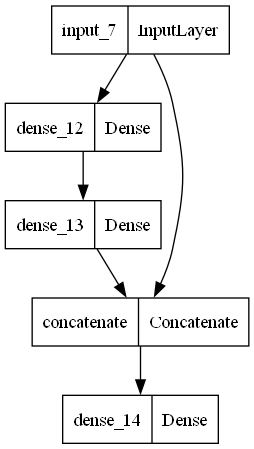

In [19]:
utils.plot_model(model)

### 2-2-2. 여러 인풋 사용 가능

In [20]:
input_1 = keras.Input(shape=(10, 10), name='Input_1')
input_2 = keras.Input(shape=(10, 28), name='Input_2')

hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='output')(concat)

model = models.Model(inputs=[input_1, input_2], outputs=[output])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 10, 100)      2900        ['Input_2[0][0]']                
                                                                                                  
 Input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 10, 10)       1010        ['dense_15[0][0]']               
                                                                                            

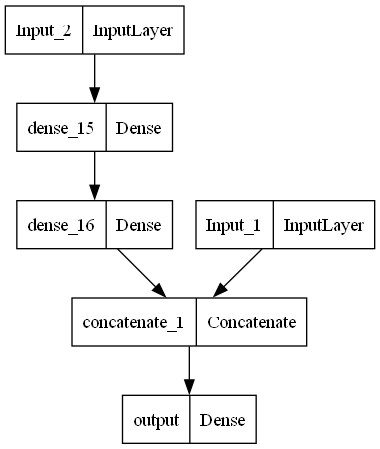

In [21]:
utils.plot_model(model)

### 2-2-3. 결과를 여러개로 나눠서 사용하는 것도 가능

In [22]:
input_ = keras.Input(shape=(10, 10), name='input_')
hidden1 = layers.Dense(100, activation='relu')(input_)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
output = layers.Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_17 (Dense)               (None, 10, 100)      1100        ['input_[0][0]']                 
                                                                                                  
 dense_18 (Dense)               (None, 10, 10)       1010        ['dense_17[0][0]']               
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_18[0][0]']               
                                                                                            

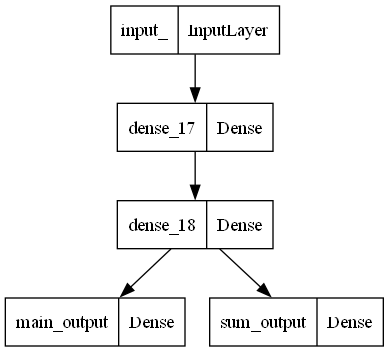

In [23]:
utils.plot_model(model)

### 2-2-4. 다중 출력 가능한 모델 생성

In [24]:
input_1 = keras.Input(shape=(10, 10), name='input_1')
input_2 = keras.Input(shape=(10, 28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_19 (Dense)               (None, 10, 100)      2900        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_20 (Dense)               (None, 10, 10)       1010        ['dense_19[0][0]']               
                                                                                            

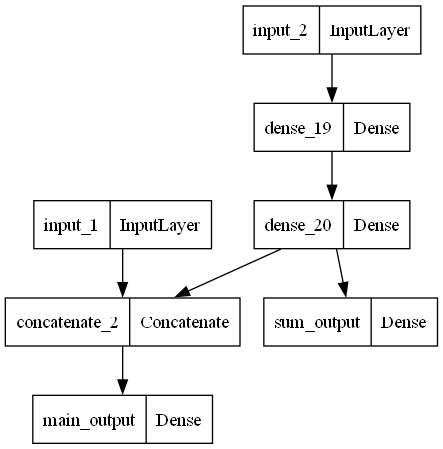

In [25]:
utils.plot_model(model)

## 2-3. Subclassing API

In [26]:
# Subclassing API의 예시
class MyModel(models.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = layers.Dense(300, activation=activation)
    self.dense_layer2 = layers.Dense(100, activation=activation)
    self.dense_layer3 = layers.Dense(units, activation=activation)
    self.output_layer = layers.Dense(10, activation='softmax')

  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x

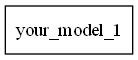

In [31]:
utils.plot_model(model)

# QUIZZ

## 1. Sequential API

In [27]:
model = models.Sequential()

# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요.
model = models.Sequential()
model.add(layers.Input(shape=(100, 100, 3)))

# Flatten 레이어를 쌓으세요.
model.add(layers.Flatten())

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(400, activation='relu'))

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(200, activation='relu'))

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
model.add(layers.Dense(100, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 30000)             0         
                                                                 
 dense_21 (Dense)            (None, 400)               12000400  
                                                                 
 dense_22 (Dense)            (None, 200)               80200     
                                                                 
 dense_23 (Dense)            (None, 100)               20100     
                                                                 
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


## 2. Functional API

In [28]:
# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요
inputs = layers.Input(shape=(100, 100, 3))

# Flatten 레이어를 쌓으세요.
x = layers.Flatten()(inputs)

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(400, activation='relu')(x)

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(200, activation='relu')(x)

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(100, activation='softmax')(x)

model = models.Model(inputs = inputs, outputs = x)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 flatten_3 (Flatten)         (None, 30000)             0         
                                                                 
 dense_24 (Dense)            (None, 400)               12000400  
                                                                 
 dense_25 (Dense)            (None, 200)               80200     
                                                                 
 dense_26 (Dense)            (None, 100)               20100     
                                                                 
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


## 3. Subclassing API

In [29]:
class YourModel(models.Model):
  def __init__(self, **kwargs):
    super(YourModel, self).__init__(**kwargs)
    # Flatten 레이어를 쌓으세요.
    self.flat_layer = layers.Flatten()
    # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer1 = layers.Dense(400, activation='relu')
    # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer2 = layers.Dense(200, activation='relu')
    # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
    self.output_layer = layers.Dense(100, activation='softmax')

  def call(self, inputs):
    # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
    x = self.flat_layer(inputs)
    x = self.dense_layer1(x)
    x = self.dense_layer2(x)
    x = self.output_layer(x)
    return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.reshape(data, (-1, 100, 100, 3))
model = YourModel()
model(data)

model.summary()

Model: "your_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_27 (Dense)            multiple                  12000400  
                                                                 
 dense_28 (Dense)            multiple                  80200     
                                                                 
 dense_29 (Dense)            multiple                  20100     
                                                                 
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


In [30]:
class YourModel(models.Model):
  def __init__(self, **kwargs):
    super(YourModel, self).__init__(**kwargs)
    self.dense_1 = layers.Dense(100, activation='relu')
    self.dense_2 = layers.Dense(100, activation='relu')
    self.concat = layers.Concatenate(axis=-1)
    self.dense_3 = layers.Dense(40, activation='relu')
    self.dense_4 = layers.Dense(1, activation='relu')
    self.dense_5 = layers.Dense(10, activation='softmax')

  def call(self, inputs):
    input_1, input_2 = inputs  # 튜플 또는 리스트로 들어옴
    a = self.dense_1(input_1)
    b = self.dense_2(input_2)
    concat = self.concat([a, b])
    c = self.dense_3(concat)
    out_1 = self.dense_4(concat)
    out_2 = self.dense_5(c)
    
    return out_1, out_2

model = YourModel()
x1 = tf.random.normal((1, 40))
x2 = tf.random.normal((1, 10))

model((x1, x2))  # 모델 빌드

model.summary()

Model: "your_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            multiple                  4100      
                                                                 
 dense_31 (Dense)            multiple                  1100      
                                                                 
 concatenate_3 (Concatenate)  multiple                 0         
                                                                 
 dense_32 (Dense)            multiple                  8040      
                                                                 
 dense_33 (Dense)            multiple                  201       
                                                                 
 dense_34 (Dense)            multiple                  410       
                                                                 
Total params: 13,851
Trainable params: 13,851
Non-trai

In [ ]:
model = YourModel()
utils.plot_model(model)